In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import sys
import collections
import math
import pickle
import re
import bisect


def store(x, path):
    with open(path, 'wb') as f:
        pickle.dump(x, f)

def load(x, path):
    with open(path, 'rb') as f:
        x = pickle.load(f)

def avg(x):
    return sum(x) / float(len(x))

def variance(x):
    n = len(x)
    mean = sum(x) / float(n)
    ss = sum([(i-mean)**2 for i in x]) / float(n)
    ss = math.sqrt(ss)
    return ss

def cdf(arr):
    x = sorted(arr)
    y = [i for i in range(1, len(x) + 1)]
    for i in range(len(y)):
        y[i] /= float(y[-1])
    return x, y



### **Figure 12a**

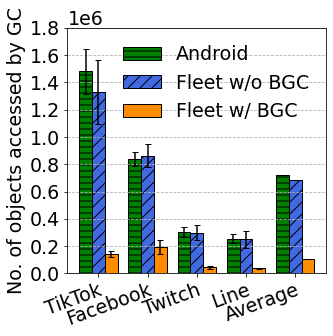

In [14]:
plt.rcParams.update({'font.size': 19})

labels = ['TikTok', 'Facebook', 'Twitch', 'Line', 'Average']

Y_scan= [1480438, 837001, 304223, 253753,
         0]
Y_scan[-1] = avg(Y_scan[:-1])
Y_scan_error = [164283, 52764, 36545, 32163, 0 ]



Y_fleet_wo_BGC = [1329732, 863745, 299353, 249356, 
                      0]
Y_fleet_wo_BGC[-1] = avg(Y_fleet_wo_BGC[:-1])
Y_fleet_wo_BGC_error = [232824, 83533, 55511, 64686,
                      0]


Y_fleet = [143566, 192895, 43658, 37210, 0]
Y_fleet[-1] = avg(Y_fleet[:-1])

Y_fleet_error = [22532, 52934, 9043, 6063, 0]



X = np.arange(len(labels))  # the label locations
width = 0.26  # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(X - 1 * width, Y_scan, width, yerr=Y_scan_error, capsize=3, color='green', hatch='--', edgecolor='black', label='Android')
rects2 = ax.bar(X + 0 * width, Y_fleet_wo_BGC, width, yerr=Y_fleet_wo_BGC_error, capsize=3, color='royalblue', hatch='//', edgecolor='black', label='Fleet w/o BGC')
rects2 = ax.bar(X + 1 * width, Y_fleet, width, yerr=Y_fleet_error, capsize=3, color='darkorange', edgecolor='black', label='Fleet w/ BGC')



ax.set_ylabel('No. of objects accessed by GC')
ax.set_xticks(X)
ax.set_xticklabels(labels,  rotation=20, ha='right', rotation_mode='anchor')
ax.set_yticks(range(0, 2000000, 200000))
ax.legend()
plt.grid(linestyle='--', axis='y' )


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

# ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.56, 1.015), ncol=2, handletextpad=0.1, columnspacing=0.1, bbox_transform=plt.gcf().transFigure)
ax.legend(frameon=False)


# autolabel(rects1)
# autolabel(rects2)



fig.tight_layout()

plt.show()
# fig.savefig('gc-working-set.pdf', bbox_inches = 'tight')

### **Figure 12b**

mutator_ws= [107237, 200399, 376763, 239619, 276916, 269071, 206718, 171572, 325329, 290974, 302160, 368869, 274081, 280784, 360191, 351294, 330264, 310042, 303645, 263334, 299830, 451932, 311191, 262957, 265056, 276473, 294648, 263930, 268595, 407072, 348168, 184294, 215966, 255013, 234252, 285791, 261396, 275236, 374819, 314826, 307344, 314187, 284110, 280614, 293577, 339917, 411347, 322590, 264094, 284615, 301481, 275208, 236410, 150356, 225853, 301998, 175569, 200176, 185380, 56492, 34202, 13238, 13422, 11453, 21400, 11805, 11925, 13083, 12728, 11730, 12477, 12185, 12596, 31572, 13225, 12329, 11296, 12982, 12812, 12703, 13928, 11383, 12830, 14495, 11997, 11264, 12438, 10907, 11773, 12777, 11642, 11261, 13063, 10949, 16618, 13534, 12311, 13115, 9696, 12501, 13676, 11403, 11937, 16126, 10927, 12587, 10642, 13352, 11168, 12341, 11742, 12033, 12203, 11697, 11885, 11563, 11875, 11858, 11250, 14242, 10876, 12349, 10359, 14728, 13206, 10420, 12682, 10314, 12626, 29534, 12581, 11697, 11577

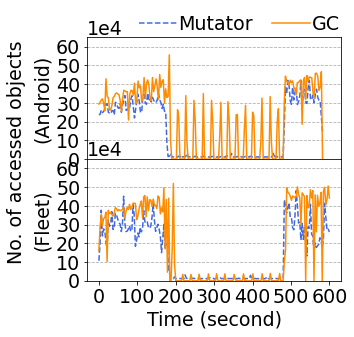

In [15]:
plt.rcParams.update({'font.size': 19})

def convert_time(st):    
    st = st.split('.')
    res = int(st[1])
    st = st[0]
    st = st.split(':')
    sec = int(st[2])
    min = int(st[1])
    hou = int(st[0])
    res = res + sec*1000 + min*60*1000 + hou*60*60*1000
    return res

# Please update this line in the log file when disabling BGC.
path = 'gc-working-set-twitch-without-BGC.log'

skip = 5

mutator_ws = []
gc_ws = []
times = []

with open(path, encoding='utf-8') as f:
    for line in f.readlines():
        ss = line.split()
        if len(ss) < 8:
            continue
        if ss[7] == 'MutatorWS=':
            mutator_n = int(ss[8])
            gc_n = int(ss[10])
            t = ss[1]
            t = convert_time(t)
            mutator_ws.append(mutator_n)
            gc_ws.append(gc_n)
            times.append(t)

mutator_ws = mutator_ws[skip:]
gc_ws = gc_ws[skip:]
times = times[skip:]

mutator_ws = mutator_ws[:-skip]
gc_ws = gc_ws[:-skip]
times = times[:-skip]

base_time = times[0]
times = [x - base_time for x in times]
# print('mutator_ws=', mutator_ws)
# print('gc_ws=', gc_ws)
            

Y_mutator_android = [x for x in mutator_ws]
Y_gc_android = [x for x in gc_ws]
X_android = [x/1000 for x in times]


# Please update this line in the log file when enabling BGC.
path = 'gc-working-set-twitch-with-BGC.log'

skip = 1

mutator_ws = []
gc_ws = []
times = []

with open(path, encoding='utf-8') as f:
    for line in f.readlines():
        ss = line.split()
        if len(ss) < 8:
            continue
        if ss[7] == 'MutatorWS=':
            mutator_n = int(ss[8])
            gc_n = int(ss[10])
            t = ss[1]
            t = convert_time(t)
            mutator_ws.append(mutator_n)
            gc_ws.append(gc_n)
            times.append(t)

mutator_ws = mutator_ws[skip:]
gc_ws = gc_ws[skip:]
times = times[skip:]

mutator_ws = mutator_ws[:-skip]
gc_ws = gc_ws[:-skip]
times = times[:-skip]

base_time = times[0]
times = [x - base_time for x in times]
print('mutator_ws=', mutator_ws)
print('gc_ws=', gc_ws)
            

Y_mutator_fleet = [x for x in mutator_ws]
Y_gc_fleet = [x for x in gc_ws]
X_fleet = [x/1000 for x in times]




linewidth=1.5




fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2,  hspace=0)
(ax1, ax2) = gs.subplots( sharex=True)

fig.text(-0.015, 0.55, 'No. of accessed objects', va='center', rotation='vertical')

ax1.plot(X_android, Y_mutator_android, linewidth=linewidth, linestyle='dashed', color='royalblue',label='Mutator')
ax1.plot(X_android, Y_gc_android,  linewidth=linewidth, color='darkorange', label='GC')


ax2.plot(X_fleet, Y_mutator_fleet, linewidth=linewidth, linestyle='dashed', color='royalblue')
ax2.plot(X_fleet, Y_gc_fleet,  linewidth=linewidth, color='darkorange')

ax1.set_ylabel('(Android)')
ax2.set_ylabel('(Fleet)')

ax2.set_xlabel('Time (second)')

ax1.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

ax1.set_xticks(range(0, 610, 100))
ax1.set_yticks(range(0, 1000000, 100000))
ax2.set_yticks(range(0, 1000000, 100000))
# ax.set_xticklabels(labels,  rotation=90)


ax1.axis(ymin=0,ymax=650000)
ax2.axis(ymin=0,ymax=650000)
# plt.yticks(range(0, 21, 3))
# plt.xticks(range(0, 31, 4))

ax1.grid(linestyle='--', axis='y' )
ax2.grid(linestyle='--', axis='y' )
# plt.legend(frameon=False)
ax1.legend(frameon=False, loc='upper center',bbox_to_anchor=(0.63, 0.98), handletextpad=0.1, columnspacing=1, ncol=2, bbox_transform=plt.gcf().transFigure)



fig.tight_layout()
plt.show()
# fig.savefig('evaluation-working-set-reduction.pdf', bbox_inches = 'tight')



Figure 12(a)